In [3]:
# import the necessary packages
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [5]:
# load the low resolution world map
world = gpd.read_file("/home/simonray/PycharmProjects/TBPaper/ne_50m_admin_0_countries.geojson")
world

,scalerank,labelrank,sovereignt,sov_a3,adm0_dif,level,type,admin,adm0_a3,geou_dif,...,region_un,subregion,region_wb,name_len,long_len,abbrev_len,tiny,homepart,featureclass,geometry
0,3,5,Netherlands,NL1,1,2,Country,Aruba,ABW,0,...,Americas,Caribbean,Latin America & Caribbean,5,5,5,4,-99,Admin-0 country,"POLYGON ((-69.89912 12.452, -69.8957 12.423, -..."
1,1,3,Afghanistan,AFG,0,2,Sovereign country,Afghanistan,AFG,0,...,Asia,Southern Asia,South Asia,11,11,4,-99,1,Admin-0 country,"POLYGON ((74.89131 37.23164, 74.84023 37.22505..."
2,1,3,Angola,AGO,0,2,Sovereign country,Angola,AGO,0,...,Africa,Middle Africa,Sub-Saharan Africa,6,6,4,-99,1,Admin-0 country,"MULTIPOLYGON (((14.19082 -5.87598, 14.39863 -5..."
3,1,6,United Kingdom,GB1,1,2,Dependency,Anguilla,AIA,0,...,Americas,Caribbean,Latin America & Caribbean,8,8,4,-99,-99,Admin-0 country,"POLYGON ((-63.00122 18.22178, -63.16001 18.171..."
4,1,6,Albania,ALB,0,2,Sovereign country,Albania,ALB,0,...,Europe,Southern Europe,Europe & Central Asia,7,7,4,-99,1,Admin-0 country,"POLYGON ((20.06396 42.54727, 20.10352 42.52466..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,1,4,Samoa,WSM,0,2,Sovereign country,Samoa,WSM,0,...,Oceania,Polynesia,East Asia & Pacific,5,5,5,-99,1,Admin-0 country,"MULTIPOLYGON (((-171.4541 -14.04648, -171.7282..."
237,1,3,Yemen,YEM,0,2,Sovereign country,Yemen,YEM,0,...,Asia,Western Asia,Middle East & North Africa,5,5,4,-99,1,Admin-0 country,"MULTIPOLYGON (((53.76318 12.63682, 53.8248 12...."
238,1,2,South Africa,ZAF,0,2,Sovereign country,South Africa,ZAF,0,...,Africa,Southern Africa,Sub-Saharan Africa,12,12,5,-99,1,Admin-0 country,"MULTIPOLYGON (((37.85693 -46.94424, 37.81396 -..."
239,1,3,Zambia,ZMB,0,2,Sovereign country,Zambia,ZMB,0,...,Africa,Eastern Africa,Sub-Saharan Africa,6,6,6,-99,1,Admin-0 country,"POLYGON ((32.91992 -9.40742, 32.92334 -9.43398..."


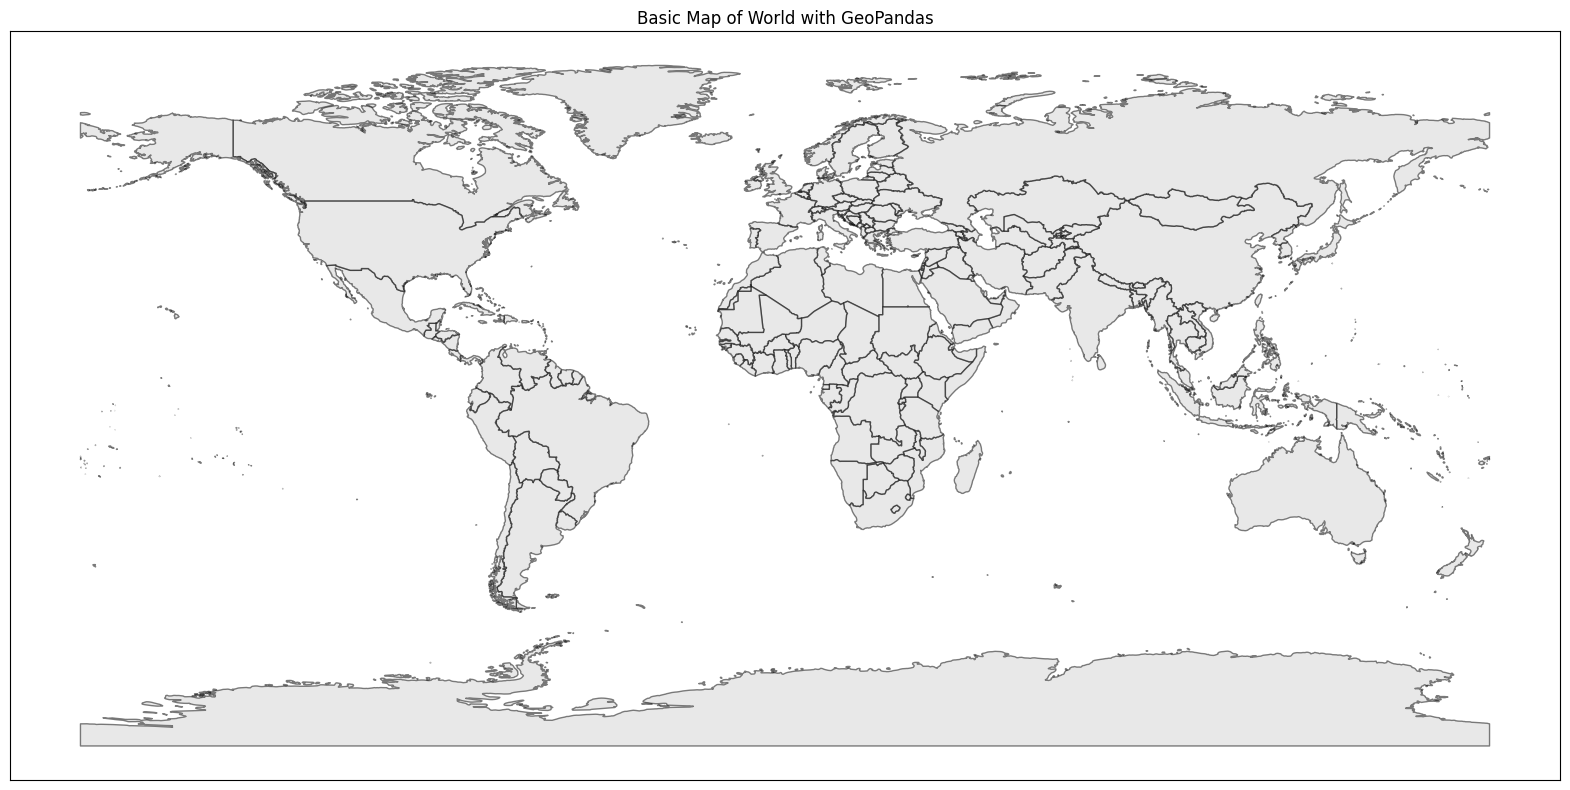

In [6]:
# initialize an empty figure and add an axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# plot a basic map of the world
world.plot(
    ax=ax,
    color="lightgray",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Basic Map of World with GeoPandas")
plt.show()

In [4]:
# display the continents, along with the number of countries per continent
world["continent"].value_counts()

continent
Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

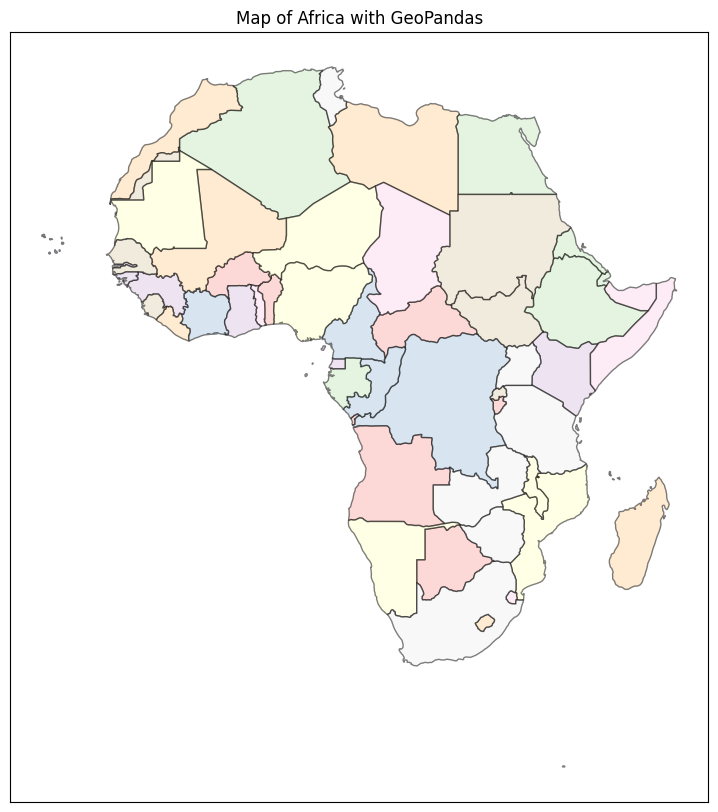

In [7]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# grab all African countries
africa = world[world["continent"] == "Africa"]

# plot a basic map of Asia
africa.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Map of Africa with GeoPandas")
plt.show()

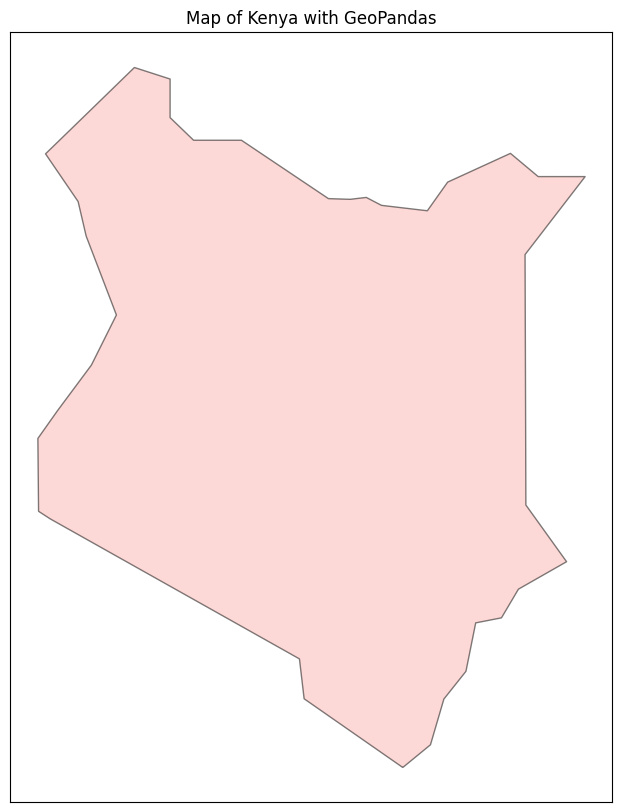

In [6]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# grab the country of Kenya
kenya = africa[africa["name"] == "Kenya"]

# plot a basic map of Kenya
kenya.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Map of Kenya with GeoPandas")
plt.show()

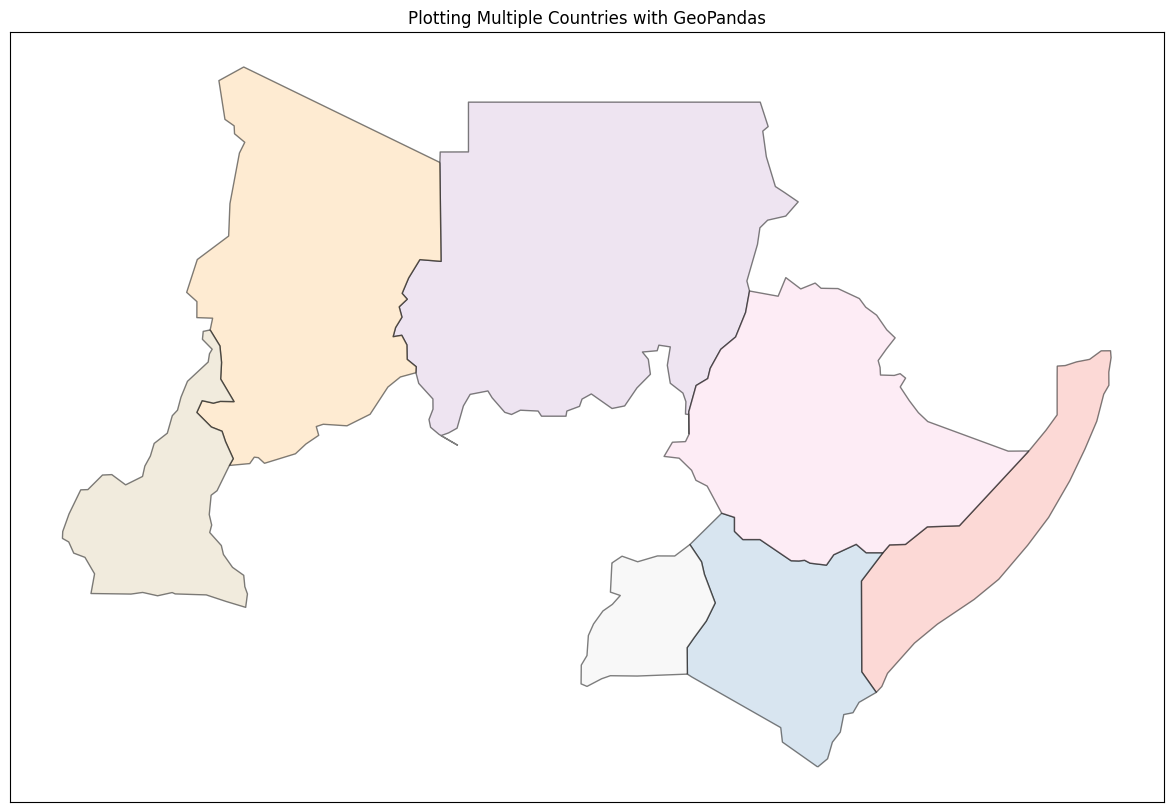

In [7]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# define the names of the countries we want to plot
country_names = [
    "Kenya",
    "Somalia",
    "Uganda",
    "Ethiopia",
    "Sudan",
    "South Sudan",
    "Chad",
    "Cameroon",
]

# grab multiple countries from the continent of Africa
countries = africa[
    africa["name"].isin(country_names)
]

# plot a map of the countries
countries.plot(
    ax=ax,
    cmap="Pastel1",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Plotting Multiple Countries with GeoPandas")
plt.show()

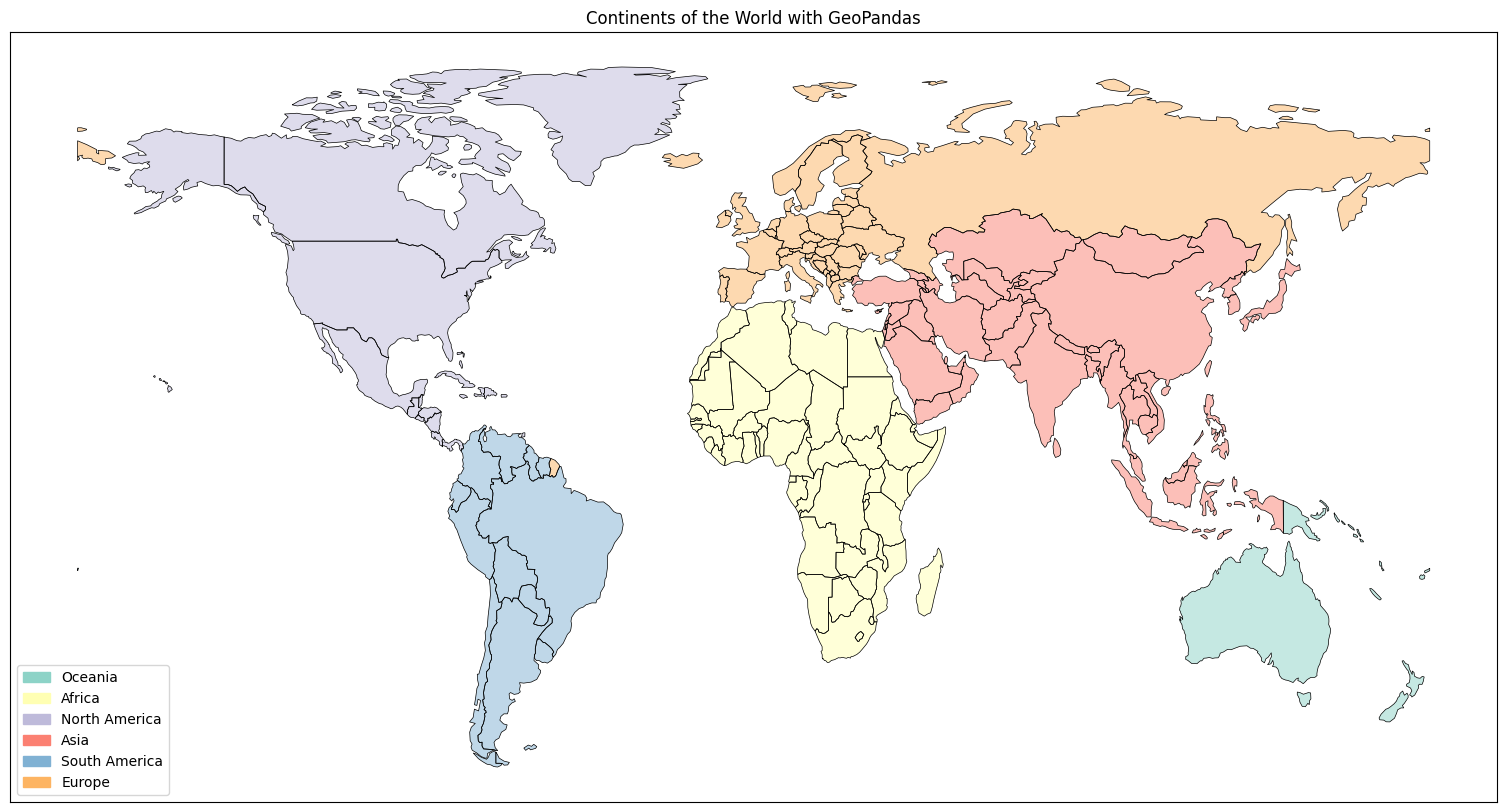

In [8]:
# initialize a final empty figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# drop "Antarctica" and "Seven seas" from the dataframe (which will make our
# world map visualization a bit prettier)
drop_idxs = world["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])
world = world.drop(world[drop_idxs].index)

# start by plotting a map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# grab the unique set of continents, generate a unique color for each one,
# and initialize the list of patches
continents = world["continent"].unique()
colors = sns.color_palette("Set3", len(continents))
patches = []

# loop over the continent names and corresponding colors
for (continent_name, color) in list(zip(continents, colors)):
    # grab all countries that belong to the continent, then plot each of the
    # continents, giving each a unique color
    continent = world[world["continent"] == continent_name]
    continent.plot(ax=ax, color=color, alpha=0.5)

    # generate a patch for the current continent
    patch = mpatches.Patch(label=continent_name, color=color)
    patches.append(patch)

# add the patches to the map
ax.legend(handles=patches, loc="lower left")

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Continents of the World with GeoPandas")
plt.show()

In [12]:
# Using data from https://data.footprintnetwork.org/#/analyzeTrends?type=EFCtot&cn=5001

import folium

political_countries_url = (
    "http://geojson.xyz/naturalearth-3.3.0/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(30, 10), zoom_start=3, tiles="cartodb positron")
folium.GeoJson(political_countries_url).add_to(m)

m.save("footprint.html")

In [14]:
import folium
import pandas as pd

eco_footprints = pd.read_csv("/home/simonray/PycharmProjects/TBPaper/data/footprint.csv")
political_countries_url = (
    "/home/simonray/PycharmProjects/TBPaper/data/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(30, 10), zoom_start=3, tiles="cartodb positron")
folium.GeoJson(political_countries_url).add_to(m)

m.save("footprint.html")

In [16]:
import folium
import pandas as pd

eco_footprints = pd.read_csv("/home/simonray/PycharmProjects/TBPaper/data/footprint.csv")
political_countries_url = (
    "/home/simonray/PycharmProjects/TBPaper/data/ne_50m_admin_0_countries.geojson"
)

m = folium.Map(location=(30, 10), zoom_start=3, tiles="cartodb positron")
folium.Choropleth(
    geo_data=political_countries_url,
    data=eco_footprints,
    columns=["Country/region", "Ecological footprint"],
    key_on="feature.properties.name",
).add_to(m)

m.save("footprint_2.html")

In [24]:
import folium
import pandas as pd

eco_footprints = pd.read_csv("/home/simonray/PycharmProjects/TBPaper/data/footprint.csv")
political_countries_url = (
    "/home/simonray/PycharmProjects/TBPaper/data/ne_50m_admin_0_countries.geojson"
)
df_genomes_by_country = pd.read_csv("/home/simonray/PycharmProjects/TBPaper/data/TB_sequenced_genomes_by_country_v2.csv")

m = folium.Map(location=(30, 10), zoom_start=3, tiles="cartodb positron")
folium.Choropleth(
    geo_data=political_countries_url,
    data=df_genomes_by_country,
    columns=["Country", "GenomeCount"],
    key_on="feature.properties.name",
).add_to(m)

m.save("genomes.html")


In [47]:
import folium
import pandas as pd

eco_footprints = pd.read_csv("/home/simonray/PycharmProjects/TBPaper/data/footprint.csv")
political_countries_url = (
    "/home/simonray/PycharmProjects/TBPaper/data/ne_50m_admin_0_countries.geojson"
)

tb_case_data_path="/home/simonray/PycharmProjects/TBPaper/data/TB_burden_countries_2025-12-07.csv"
df_tb_case_data = pd.read_csv(tb_case_data_path)
df_tb_case_data__2024= df_tb_case_data[df_tb_case_data['year']==2024]
df_tb_case_data__2024[df_tb_case_data__2024['country'] == "Viet Nam"]
# Need to change some country names to get matches between the two data frames

# Russian Federation           --> Russia
# Republic of Korea            --> South Korea
# United States of America     --> United States
# Netherlands (Kingdom of the) --> Netherlands
# Türkiye                      --> Turkey
# Viet Nam                     --> Vietnam
# Iran (Islamic Republic of)   --> Iran

df_tb_case_data__2024.loc[df_tb_case_data__2024['country'] == 'Viet Nam', 'country'] = 'Vietnam'
df_tb_case_data__2024.loc[df_tb_case_data__2024['country'] == 'Russian Federation', 'country'] = 'Russia'
df_tb_case_data__2024.loc[df_tb_case_data__2024['country'] == 'Republic of Korea', 'country'] = 'South Korea'
df_tb_case_data__2024.loc[df_tb_case_data__2024['country'] == 'United States of America', 'country'] = 'United States'
df_tb_case_data__2024.loc[df_tb_case_data__2024['country'] == 'Netherlands (Kingdom of the)', 'country'] = 'Netherlands'
df_tb_case_data__2024.loc[df_tb_case_data__2024['country'] == 'Türkiye', 'country'] = 'Turkey'
#df_tb_case_data__2024.loc[df_tb_case_data__2024['country'] == 'Viet Nam', 'country'] = 'Vietnam'
#df_tb_case_data__2024.loc[df_tb_case_data__2024['country'] == 'Iran (Islamic Republic of)', 'country'] = 'Iran'

m = folium.Map(location=(30, 10), zoom_start=3, tiles="cartodb positron")
folium.Choropleth(
    geo_data=political_countries_url,
    data=df_tb_case_data__2024,
    columns=["country", "e_inc_100k"],
    key_on="feature.properties.name",
).add_to(m)

m.save("tb_cases.html")

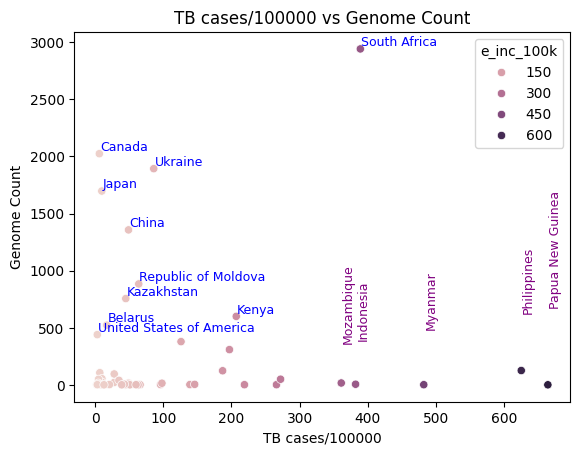

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df__tb_cases_and_genomes = pd.read_csv("/home/simonray/PycharmProjects/TBPaper/data/TB_burden_countries_2024__vs__genomes.csv")

sns.scatterplot(data=df__tb_cases_and_genomes, x='e_inc_100k', y='GenomeCount', hue='e_inc_100k')
plt.title('TB cases/100000 vs Genome Count')
plt.xlabel('TB cases/100000')
plt.ylabel('Genome Count')


for i, row in df__tb_cases_and_genomes.iterrows():
    if row['GenomeCount'] > 400:
        plt.text(row['e_inc_100k'] + 1, row['GenomeCount'] + 0.5, row['country'], 
                 color='blue', fontsize=9, ha='left', va='bottom')
        
for i, row in df__tb_cases_and_genomes.iterrows():
    if row['e_inc_100k'] > 350 and row['GenomeCount'] < 400:
        plt.text(row['e_inc_100k'] + 1, row['e_inc_100k'] + 0.5, row['country'], 
                 color='purple', fontsize=9, ha='left', va='bottom', rotation=90)        
plt.show()